In [1]:
pip install numpy sklearn scipy pandas matplotlib TensorFlow opencv-python --upgrade


Requirement already up-to-date: numpy in /home/gabriel/anaconda3/lib/python3.7/site-packages (1.21.5)
Requirement already up-to-date: sklearn in /home/gabriel/anaconda3/lib/python3.7/site-packages (0.0)
Requirement already up-to-date: scipy in /home/gabriel/anaconda3/lib/python3.7/site-packages (1.7.3)
Requirement already up-to-date: pandas in /home/gabriel/anaconda3/lib/python3.7/site-packages (1.3.5)
Requirement already up-to-date: matplotlib in /home/gabriel/anaconda3/lib/python3.7/site-packages (3.5.1)
Requirement already up-to-date: TensorFlow in /home/gabriel/anaconda3/lib/python3.7/site-packages (2.8.0)
Requirement already up-to-date: opencv-python in /home/gabriel/anaconda3/lib/python3.7/site-packages (4.5.5.64)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.layers.core import Dense, Flatten
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam

import pathlib

In [3]:
data_dir = 'Tomato-pest-image-enhancement'
img_height,img_width=180,180

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  labels='inferred',
  label_mode='categorical',
  class_names = None,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=32)

Found 4263 files belonging to 8 classes.
Using 3411 files for training.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  labels='inferred',
  label_mode='categorical',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=32)

Found 4263 files belonging to 8 classes.
Using 852 files for validation.


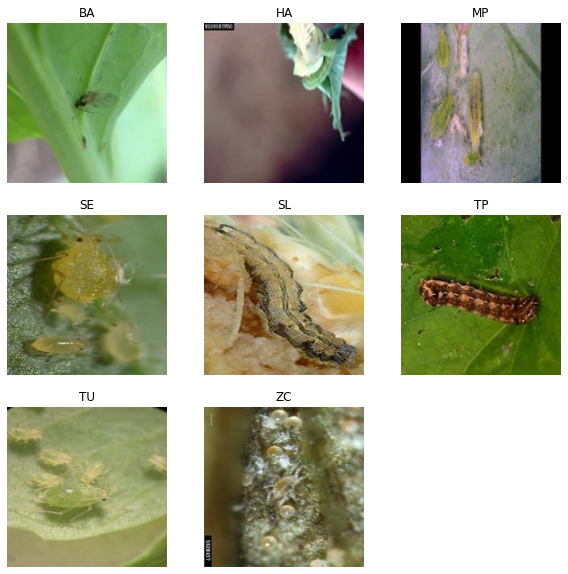

In [5]:
class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(8):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[i])
    plt.axis("off")

In [6]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(
                    include_top=False,
                    input_shape=(180,180,3),
                    pooling='avg',classes=5,
                    weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

In [7]:
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(8, activation='softmax'))

In [8]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 8)                 4104      
                                                                 
Total params: 24,640,904
Trainable params: 1,053,192
Non-trainable params: 23,587,712
_________________________________________________________________


In [9]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
107/107 [==============================] - 194s 2s/step - loss: 0.7540 - accuracy: 0.7435 - val_loss: 0.3075 - val_accuracy: 0.9002
Epoch 2/10
107/107 [==============================] - 196s 2s/step - loss: 0.1622 - accuracy: 0.9484 - val_loss: 0.1964 - val_accuracy: 0.9413
Epoch 3/10
107/107 [==============================] - 199s 2s/step - loss: 0.0595 - accuracy: 0.9853 - val_loss: 0.1793 - val_accuracy: 0.9448
Epoch 4/10
107/107 [==============================] - 199s 2s/step - loss: 0.0284 - accuracy: 0.9956 - val_loss: 0.1696 - val_accuracy: 0.9531
Epoch 5/10
107/107 [==============================] - 205s 2s/step - loss: 0.0170 - accuracy: 0.9968 - val_loss: 0.1643 - val_accuracy: 0.9542
Epoch 6/10
107/107 [==============================] - 204s 2s/step - loss: 0.0077 - accuracy: 0.9994 - val_loss: 0.1625 - val_accuracy: 0.9613
Epoch 7/10
107/107 [==============================] - 207s 2s/step - loss: 0.0086 - accuracy: 0.9979 - val_loss: 0.1354 - val_accuracy: 0.9589

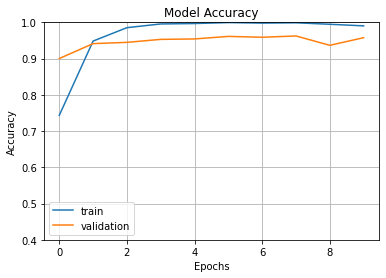

In [10]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [11]:
import cv2

data_dir = pathlib.Path(data_dir)

BA = list(data_dir.glob('BA/*'))


image=cv2.imread(str(BA[0]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)


In [12]:
pred=resnet_model.predict(image)

In [13]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is BA
